In [6]:
# import libraries
import numpy as np
import pandas as pd
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = '20'

In [2]:
# read the dataframe
data_path = Path.cwd().parent / 'data' / 'paris_solcast_cleaned.csv'
df = pd.read_csv(data_path, index_col=0)

In [3]:
df

date  Temperature  CloudOpacity        DHI         DNI  \
0     2018-12-31     7.888889     65.944444  35.777778    0.000000   
1     2019-01-01     6.922222     68.077778  36.111111    0.000000   
2     2019-01-02     4.266667     40.544444  70.888889   13.555556   
3     2019-01-03     2.800000     35.677778  83.111111   18.111111   
4     2019-01-04     2.033333     52.322222  67.333333   21.777778   
...          ...          ...           ...        ...         ...   
1082  2021-12-17     7.344444     47.888889  46.444444  100.000000   
1083  2021-12-18     6.588889      0.000000  31.888889  523.333333   
1084  2021-12-19     4.688889     35.577778  92.555556    0.000000   
1085  2021-12-20     6.166667     68.200000  33.555556    0.000000   
1086  2021-12-21     2.611111      1.222222  33.333333  538.888889   

       Radiation  Precipitation   Humidity     Pressure  WindDirection  \
0      35.777778      13.555556  95.400000  1021.477778     329.111111   
1      36.111111       9.877778  90.033333  1019.522222     306.777778   
2      72.000000       6.833333  74.255556  1024.744444      10.777778   
3      84.666667       7.666667  83.722222  1025.077778      21.333333   
4      71.555556       8.544444  86.611111  1024.966667      53.555556   
...          ...            ...        ...          ...            ...   
1082   62.666667      11.244444  79.222222  1025.877778      56.000000   
1083  154.111111       9.111111  72.755556  1024.577778      47.222222   
1084   92.555556       7.522222  81.922222  1020.800000      43.555556   
1085   33.555556       8.044444  69.700000  1015.777778      66.111111   
1086  159.000000       4.466667  62.322222  1012.955556      71.222222   

      WindSpeed   Sunrise    Sunset  
0      1.855556  09:00:00  17:00:00  
1      3.544444  09:00:00  17:00:00  
2      4.577778  09:00:00  17:00:00  
3      3.222222  09:00:00  17:00:00  
4      3.088889  09:00:00  17:00:00  
...         ...       ...       ...  
1082   3.688889  09:00:00  17:00:00  
1083   3.200000  09:00:00  17:00:00  
1084   3.122222  09:00:00  17:00:00  
1085   3.522222  09:00:00  17:00:00  
1086   2.633333  09:00:00  17:00:00  

[1087 rows x 13 columns]

### Dataset description

In [4]:
df.describe()

Temperature  CloudOpacity          DHI          DNI    Radiation  \
count  1087.000000   1087.000000  1087.000000  1087.000000  1087.000000   
mean     13.918548     31.181688   130.808319   231.371639   246.836258   
std       6.706803     21.114850    59.987640   214.300141   129.576857   
min      -2.230000      0.000000    24.333333     0.000000    24.333333   
25%       8.752778     12.366667    79.966667    38.977273   136.950000   
50%      13.309091     30.344444   117.687500   172.125000   237.166667   
75%      19.397426     47.933036   180.127083   396.250000   351.178571   
max      35.268750     80.225000   273.687500   749.428571   525.187500   

       Precipitation     Humidity     Pressure  WindDirection    WindSpeed  
count    1087.000000  1087.000000  1087.000000    1087.000000  1087.000000  
mean       17.522308    63.492437  1005.659411     186.542765     3.819368  
std         7.443134    13.802918     9.468740      88.931478     1.809628  
min         2.576923    26.018750   964.962500       5.909091     0.472727  
25%        11.505556    53.192411  1000.538750     109.644231     2.467647  
50%        16.456250    63.208333  1006.655556     207.555556     3.550000  
75%        22.575000    74.159375  1011.737255     250.000000     4.864583  
max        43.885714    95.511111  1034.990000     351.083333    11.425000

### Total radiation per month

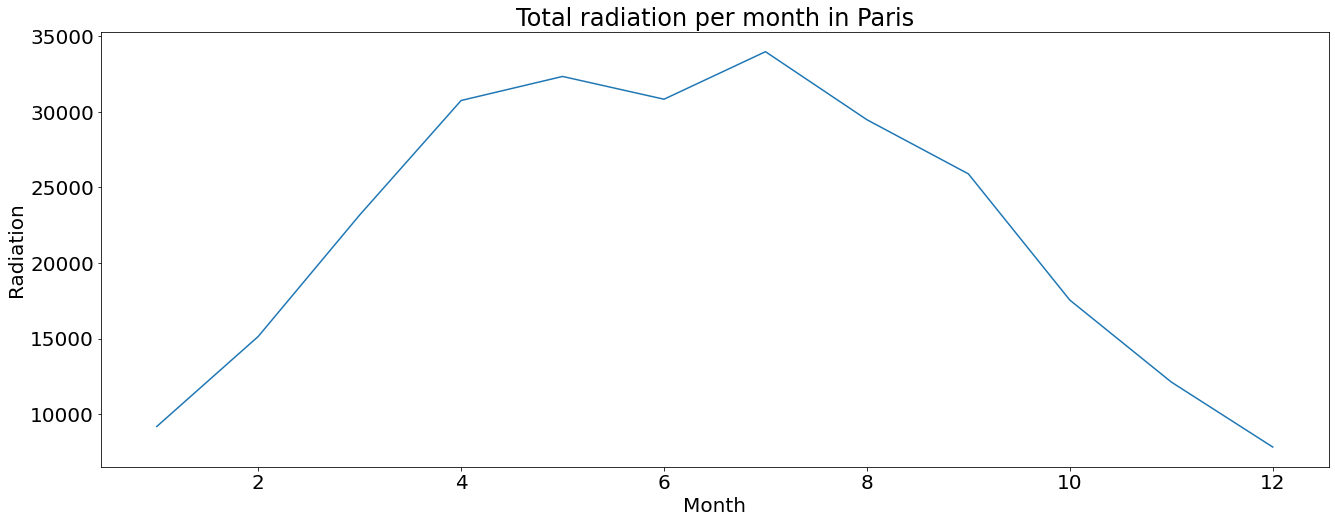

In [7]:
df['Month'] = pd.to_datetime(df['date']).dt.month
df_rad_per_month = df[['Radiation', 'Month']].groupby('Month').sum()

fig, ax = plt.subplots(1,1, figsize=(22,8))
sns.lineplot(x="Month", y="Radiation", data=df_rad_per_month, ax=ax)
ax.set_title('Total radiation per month in Paris');

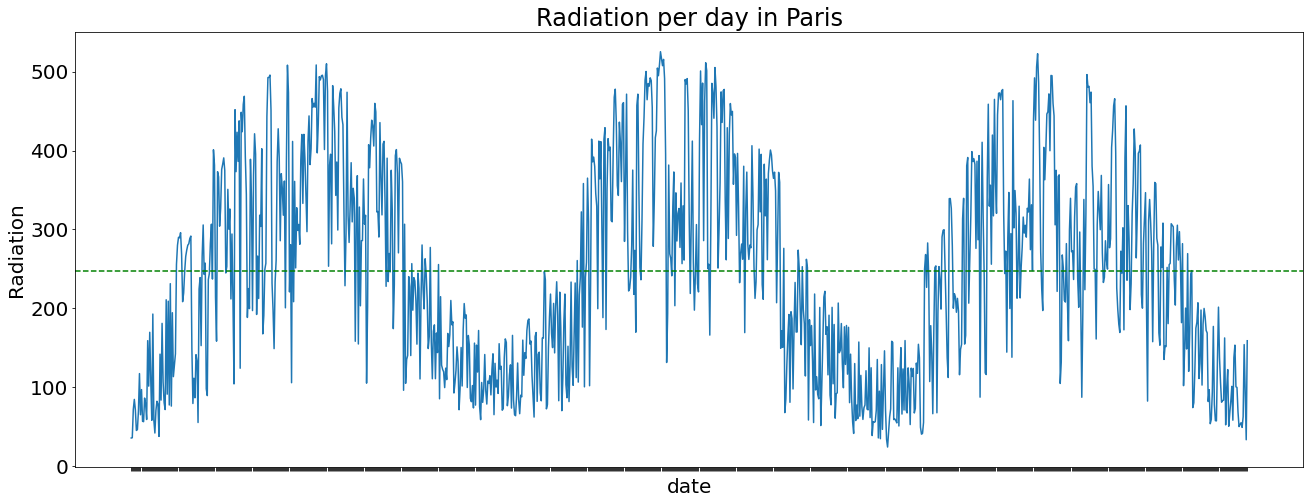

In [15]:
## Daily solar radiation plot

rad_avg = df['Radiation'].mean()

fig, ax = plt.subplots(1,1, figsize=(22,8))
sns.lineplot(x="date", y="Radiation", data=df, ax=ax)
ax.set_title('Radiation per day in Paris');
ax.axhline(rad_avg, color='green', linestyle='--', label=f"Mean - {rad_avg:.2f}")
ax.set(xticklabels=[]);

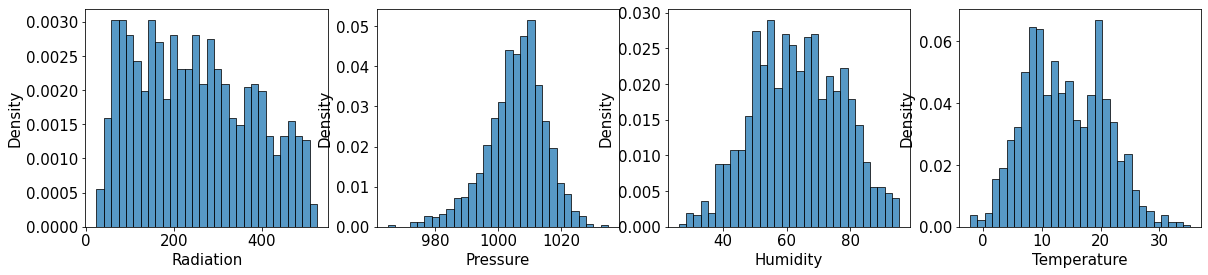

In [18]:
# Histogram distribution of weather features and solar irradiation
plt.rcParams['font.size'] = '15'
f, ax = plt.subplots(1, 4, figsize=(20,4))
sns.histplot(df['Radiation'], stat="density", bins=30, ax=ax[0])
sns.histplot(df['Pressure'], stat="density", bins=30, ax=ax[1])
sns.histplot(df['Humidity'], stat="density", bins=30, ax=ax[2])
sns.histplot(df['Temperature'], stat="density", bins=30, ax=ax[3])
plt.show()

### Correlation plot

<ipython-input-21-4251095b9269>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, annot=True, fmt=".2f", ax=ax)


<AxesSubplot:>

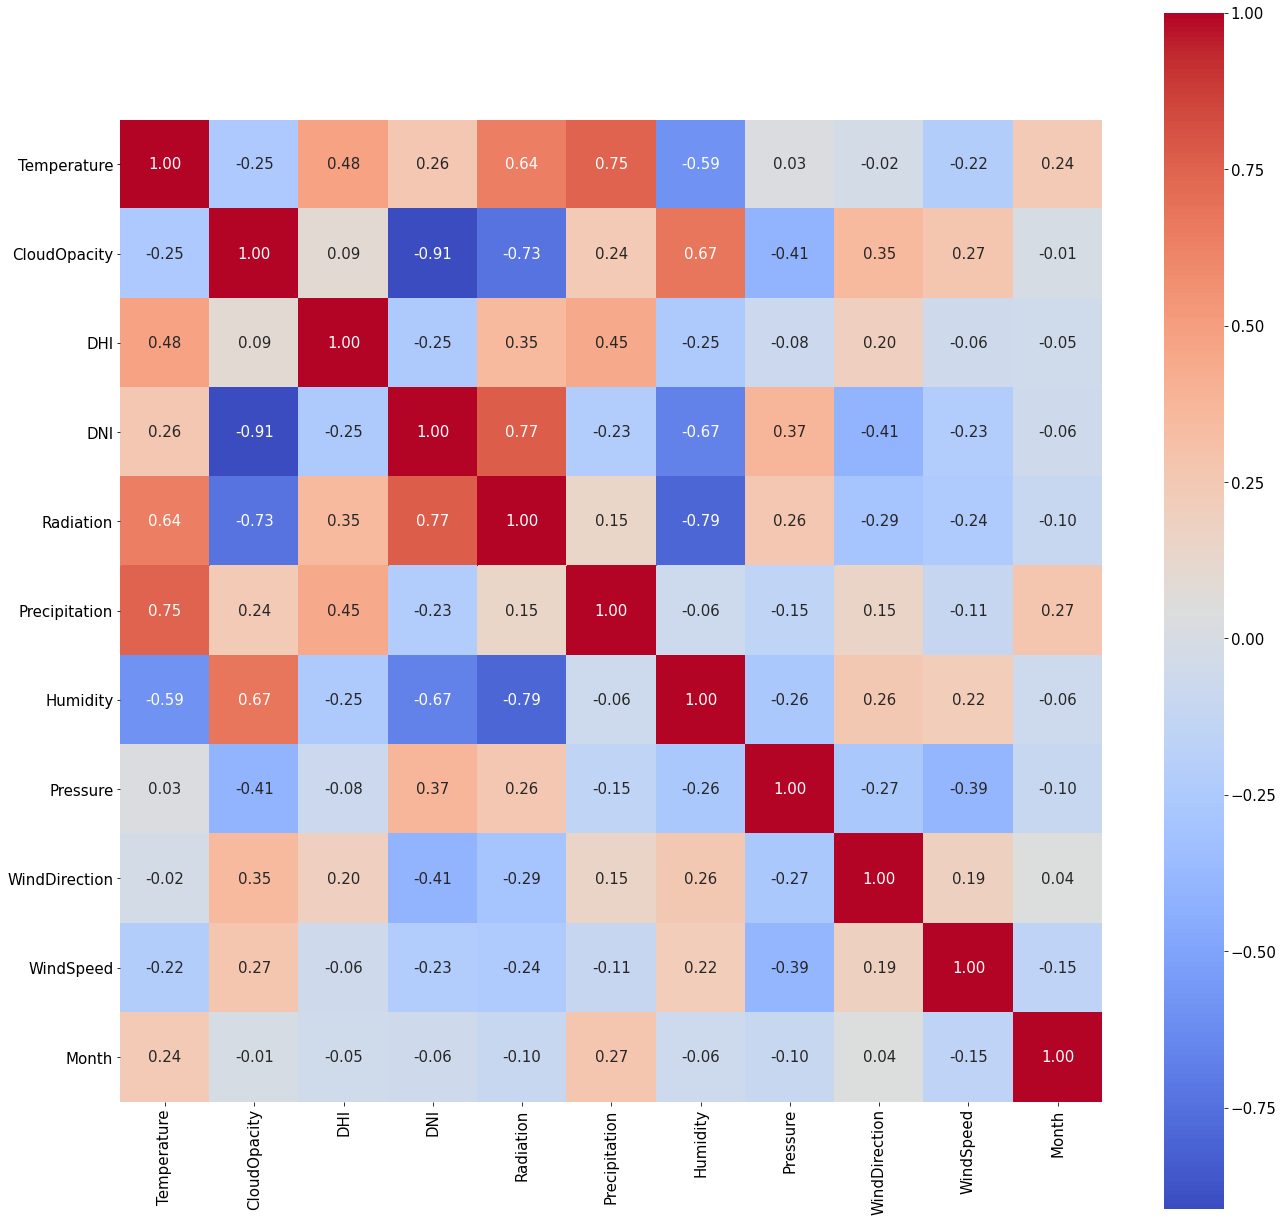

In [21]:
# feature correlation
corr= df.corr(method = "pearson")

fig, ax = plt.subplots(1, 1, figsize=(22, 22))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, annot=True, fmt=".2f", ax=ax)

In [23]:
# Adfuller testt on target feature
from statsmodels.tsa.stattools import adfuller
Xrad = df['Radiation'].values
result = adfuller(Xrad)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) # p-value <= 0.05

ADF Statistic: -3.014489
p-value: 0.033563
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
